# Project Report: Bank Market Segmentation Using Artificial Neural Networks (ANN)

## 1. Project Information
**Project Title:**  
**Bank Market Segmentation Using Artificial Neural Networks (ANN)**  

**Student Name(s) & Enrolment Number(s):**  
Rajiv Ranjan (055038) & Arnav Mehra (055030)  

**Group Number (if any):**  
12  

---

## 2. Description of Data
**Data Source:**  
[Bank Marketing Dataset](https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing)  

**Data Size:**  
Approximately 6.6 MB  

**Data Type:**  
Cross-sectional  

**Data Dimension:**  
(Number of Variables | Number of Observations)  

### **Data Variable Type:**
- **Numeric:** Integer, Decimal  
- **Non-Numeric:** Categorical, Binary  

### **Data Variables and Categories**
- **Input Variables:** Features affecting subscription decisions  
- **Output Variable:** `y` (Has the client subscribed to a term deposit?)  

### **Dataset Description**
The dataset consists of 16 input features and 1 output feature, capturing details about clients, their past interactions, and campaign performance.  

#### **List of Variables**
1. `age` - Age (numeric)  
2. `job` - Type of job (categorical)  
3. `marital` - Marital status (categorical)  
4. `education` - Education level (categorical)  
5. `default` - Has credit in default? (binary)  
6. `balance` - Average yearly balance in euros (numeric)  
7. `housing` - Has housing loan? (binary)  
8. `loan` - Has personal loan? (binary)  
9. `contact` - Contact communication type (categorical)  
10. `day` - Last contact day of the month (numeric)  
11. `month` - Last contact month of the year (categorical)  
12. `duration` - Last contact duration in seconds (numeric)  
13. `campaign` - Number of contacts performed during this campaign (numeric)  
14. `pdays` - Days since last contacted (numeric, -1 means not previously contacted)  
15. `previous` - Number of contacts before this campaign (numeric)  
16. `poutcome` - Outcome of the previous campaign (categorical)  
17. `y` - Target variable: Has the client subscribed? (binary: "yes" / "no")  

---

## **3. Project Objectives | Problem Statements**
### **Objective:**  
To build an Artificial Neural Network (ANN) model to predict customer subscription behavior based on various demographic, financial, and campaign-related features.  

### **Problem Statement:**
1. **Customer Segmentation:** Identifying the key characteristics of customers who subscribe to a term deposit.  
2. **Imbalance Handling:** Addressing class imbalance since most customers do not subscribe (No: 35,000 vs Yes: 5,000).  
3. **Feature Engineering:** Identifying key variables affecting customer decisions.  
4. **ANN Model Performance:** Developing an ANN model and optimizing its performance.  

---

## **4. Analysis of Data**
### **Initial Data Exploration**
- Used `.info()` to check data types and missing values.  
- Used `.shape` to confirm 41,188 rows and 21 columns.  
- Checked for missing values (`df.isna().sum()`) – No missing values found.  
- Checked for duplicate entries (`df.duplicated().sum()`) – Duplicates were removed.  

### **Handling Outliers**
- `Age` & `Duration` outliers were detected using Boxplots.  
- Outliers were handled using the **IQR method (capping).**  

### **Data Visualization**
- **Histograms:** Age and Duration distributions.  
- **Countplots:** Job-wise distribution and `y` label distribution.  
- **Scatter Plots:** Relationship between Age, Duration, and Campaign.  
- **3D Scatter Plot:** Analyzed Age, Duration, and Campaign impact.  
- **Parallel Coordinates Plot:** Visualized multiple numeric features.  

### **Class Imbalance**
- **Class Distribution:** No: 35,000, Yes: 5,000.  
- **Solution:** Consider using **SMOTE or class weighting** in future iterations.  

---

## **5. Observations | Findings**
1. Most customers did not subscribe (**No: 35,000 vs Yes: 5,000**).  
2. **Job and Duration play key roles** – certain jobs have higher subscription rates.  
3. **Duration has a strong correlation** with subscription rates (longer calls = higher chances of subscription).  
4. **Class imbalance may affect model performance** – requires handling techniques.  
5. **Outliers in Age and Duration** were successfully handled via IQR.  

---

## **6. Model Building & Performance Analysis**
### **Data Preprocessing**
1. Encoded Categorical Variables using `LabelEncoder()`.  
2. Split Data into **train (80%)** and **test (20%)** sets.  
3. Standardized Features using `StandardScaler()`.  

### **Model Architecture (ANN)**
- **Input Layer:** 16 neurons (ReLU Activation)  
- **Hidden Layer:** 8 neurons (ReLU Activation)  
- **Output Layer:** 1 neuron (Sigmoid Activation)  

### **Training Details**
- **Optimizer:** Adam  
- **Loss Function:** Binary Crossentropy  
- **Batch Size:** 32  
- **Epochs:** 30  
- **Validation Split:** 20%  

### **Performance Metrics**
#### **Final Model Evaluation on Test Data**
- **Test Accuracy:** 90.35%  
- **Test Loss:** 0.2104  

#### **Training & Validation Accuracy Trends**
- **No overfitting observed** (training and validation accuracy trends were close).  
- ANN performed well, but **handling class imbalance** might further improve results.  

---

## **7. Managerial Insights | Recommendations**
### **Key Insights**
1. **Call Duration is the most critical factor** – longer calls increase subscription rates.  
2. **Certain jobs (e.g., management, blue-collar)** show different subscription trends.  
3. **Class imbalance needs to be addressed** – use techniques like **SMOTE or cost-sensitive learning**.  
4. **ANN model achieved a high accuracy of 89.75%** – indicating strong predictive power.  

### **Recommendations for Business Decisions**
- **Prioritize customers with longer call durations** – higher likelihood of subscription.  
- **Segment customers based on job roles & demographics** for targeted marketing.  
- **Optimize calling strategies** based on high-conversion segments.  
- **Consider improving the model further** using **hyperparameter tuning.**  

---

## **Conclusion**
This project successfully built an ANN-based customer segmentation model to predict subscription likelihood in a banking campaign. While the model performed well, handling class imbalance and further fine-tuning could enhance performance. The findings offer valuable insights for targeted marketing strategies and customer segmentation.


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

# Data Preparation


In [ ]:
df = pd.read_csv("bank_marketing_data_new.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.shape

(41188, 21)

**Handling Missing Values**

In [ ]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
df.duplicated().sum()

np.int64(12)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(41176, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.017972
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.177913
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


**Detect Outliers for Numerical Columns**

Text(0.5, 1.0, 'Age Outliers')

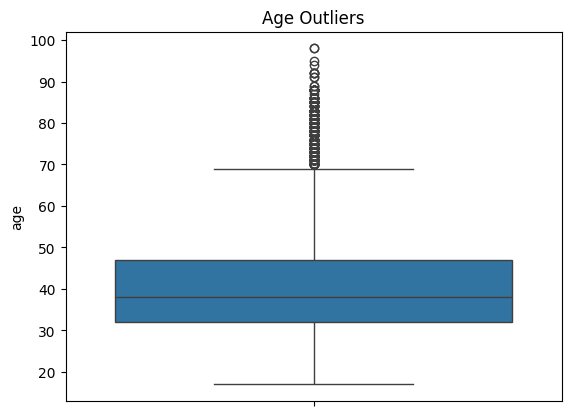

In [ ]:
sns.boxplot(y = 'age' , data=df)
plt.title('Age Outliers')

In [ ]:
# Handle Outliers
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap the outliers
df['age'] = np.where(df['age'] < lower_bound, lower_bound, df['age'])
df['age'] = np.where(df['age'] > upper_bound, upper_bound, df['age'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


Text(0.5, 1.0, 'Age Outliers')

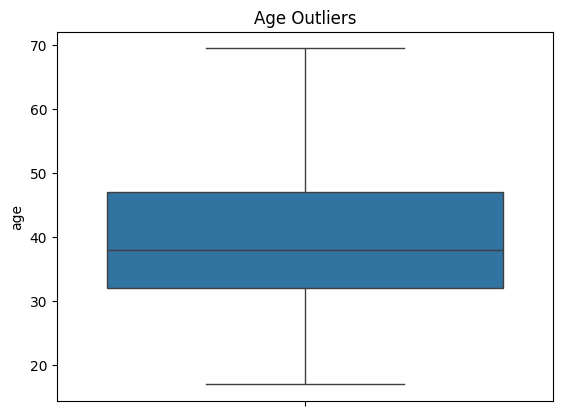

In [ ]:
sns.boxplot(y = 'age' , data=df)
plt.title('Age Outliers')

Text(0.5, 1.0, 'Duration Outliers')

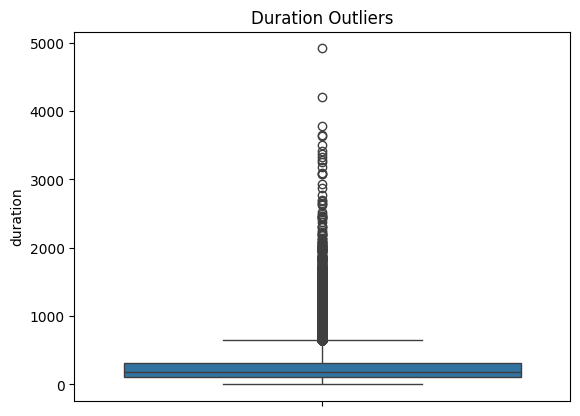

In [ ]:
sns.boxplot(y = 'duration' , data=df)
plt.title('Duration Outliers')

In [ ]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap the outliers
df['duration'] = np.where(df['duration'] < lower_bound, lower_bound, df['duration'])
df['duration'] = np.where(df['duration'] > upper_bound, upper_bound, df['duration'])

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


Text(0.5, 1.0, 'Duration Outliers')

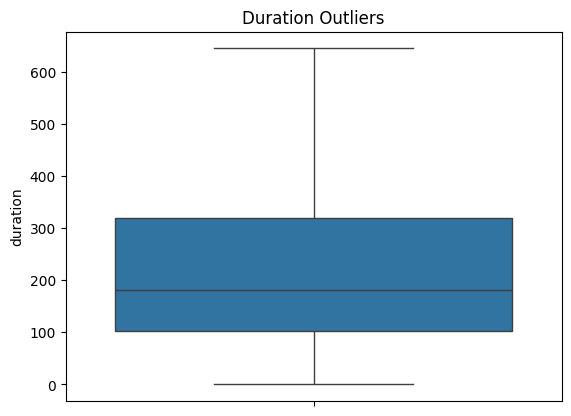

In [ ]:
sns.boxplot(y = 'duration' , data=df)
plt.title('Duration Outliers')

# Exploratory Data Analysis


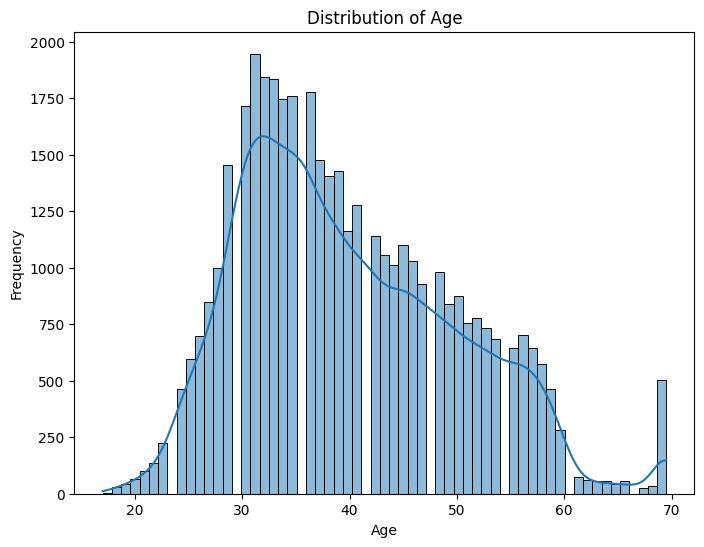

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

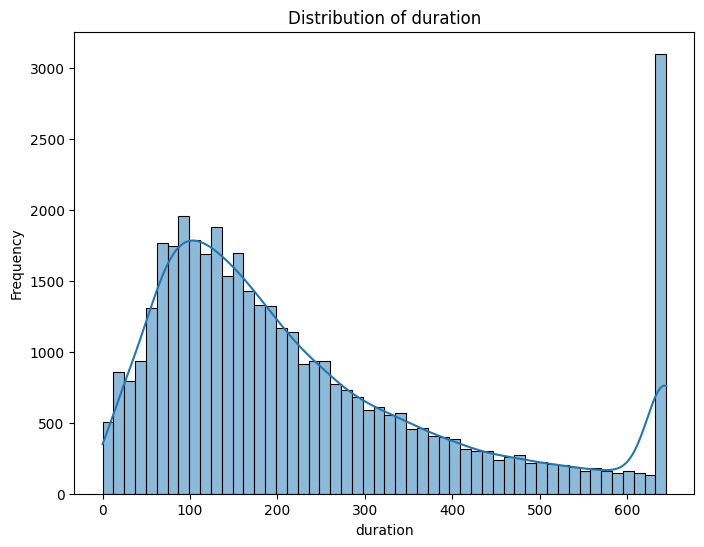

In [ ]:
# Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], kde=True)
plt.title('Distribution of duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'jobs Distribution')

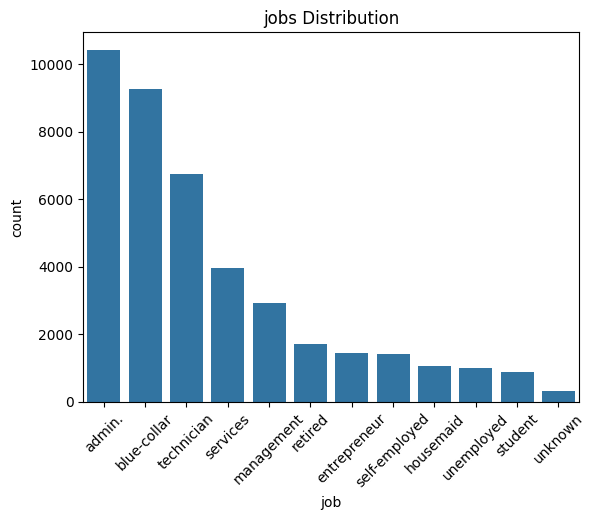

In [ ]:
# Job Distribution
sns.countplot(data=df,x='job',order = df['job'].value_counts().index)
plt.xticks(rotation = 45)
plt.title("jobs Distribution")

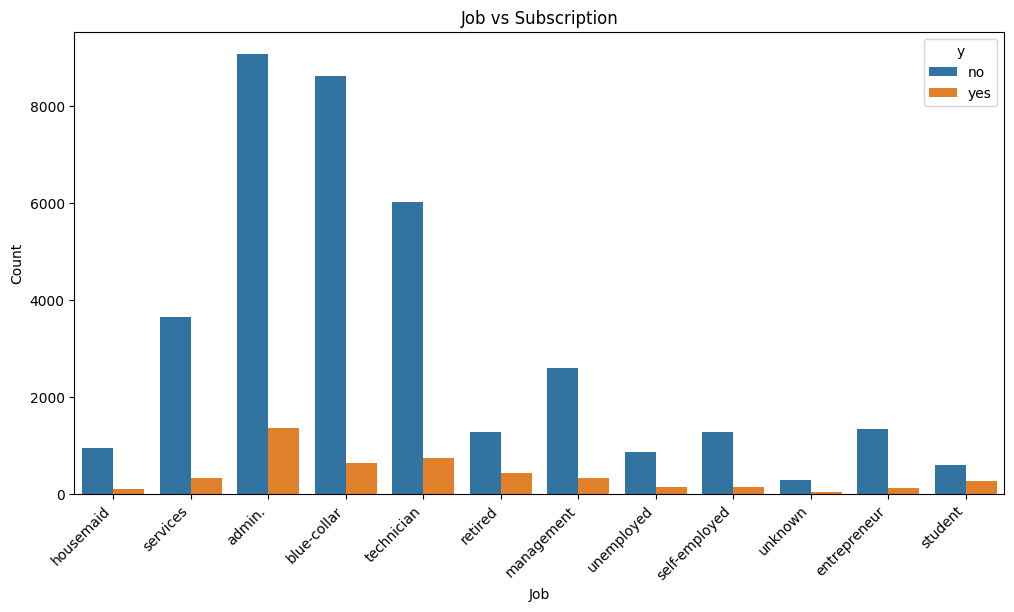

In [ ]:
# bar plot of job vs subscribed
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df)
plt.title('Job vs Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

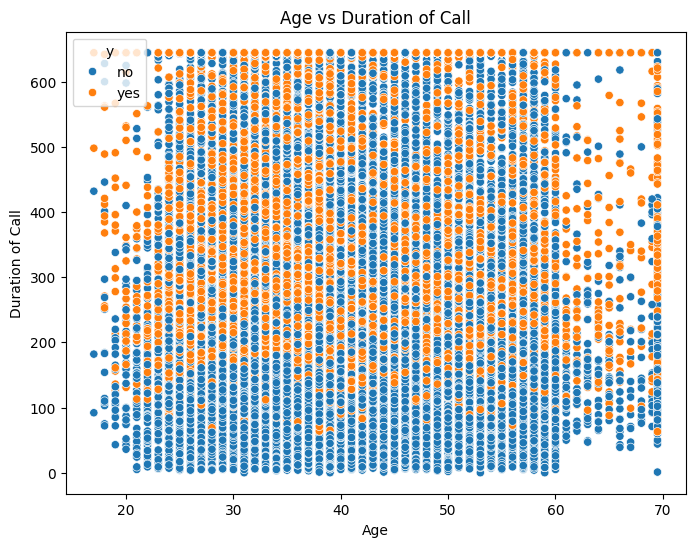

In [ ]:
# Scatter plot of age vs duration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='duration', hue='y', data=df)
plt.title('Age vs Duration of Call')
plt.xlabel('Age')
plt.ylabel('Duration of Call')
plt.show()

In [ ]:
# 3D Scatter Plot (Example: age, duration, campaign)
fig = px.scatter_3d(df, x='age', y='duration', z='campaign', color='y',
                    title='Age, Duration, Campaign and Subscription')
fig.show()

In [ ]:
# Parallel Coordinates Plot (Example: multiple numerical features)
fig = px.parallel_coordinates(df, dimensions=['age', 'duration', 'campaign', 'pdays', 'previous'],
                              title='Parallel Coordinates Plot of Selected Features')
fig.show()

<Axes: xlabel='y', ylabel='count'>

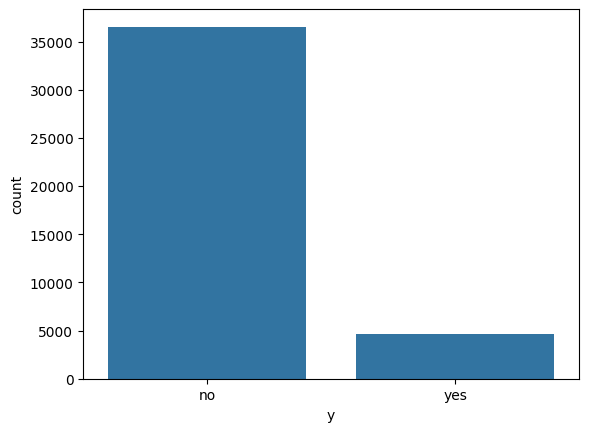

In [ ]:
sns.countplot(x='y', data=df, order=df['y'].value_counts().index)

# Preprocessing Neural Network

In [ ]:
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [ ]:
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [ ]:
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4964,1
41184,46.0,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4964,0
41185,56.0,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4964,0
41186,44.0,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4964,1


**Data Splitting**

In [ ]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55038)

**Data Scaling**


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Neural Network Model

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = x_train.shape[1])) # first layer
model.add(Dense(units=8, activation='relu'))  # second layer
model.add(Dense(units=1, activation='sigmoid')) # final layer

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Evaluation


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7646 - loss: 57.1481 - val_accuracy: 0.8743 - val_loss: 0.3073
Epoch 2/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8792 - loss: 0.3689 - val_accuracy: 0.8977 - val_loss: 0.3064
Epoch 3/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8854 - loss: 0.3323 - val_accuracy: 0.8916 - val_loss: 0.8425
Epoch 4/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8830 - loss: 0.3971 - val_accuracy: 0.8919 - val_loss: 0.5168
Epoch 5/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8864 - loss: 0.3281 - val_accuracy: 0.7992 - val_loss: 0.5302
Epoch 6/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8914 - loss: 0.3398 - val_accuracy: 0.8904 - val_loss: 0.2478
Epoch 7/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8962 - loss: 0.2809 - val_accuracy: 0.8985 - val_loss: 0.2527
Epoch 8/30
824/824 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8871 - loss: 0.3211 - val_accuracy: 0

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9121 - loss: 0.2104
Test Accuracy: 90.35%


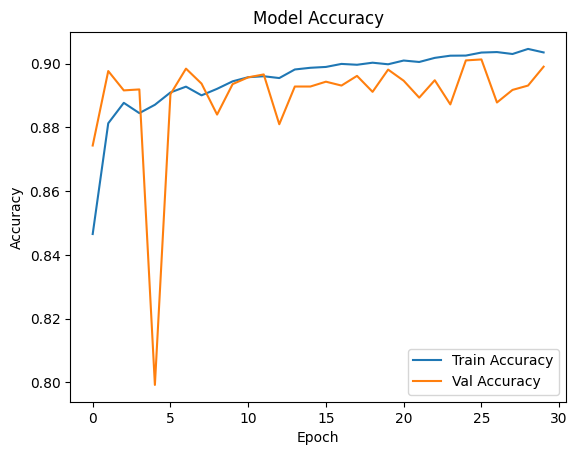

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

PermutationExplainer explainer: 8237it [11:58, 11.39it/s]


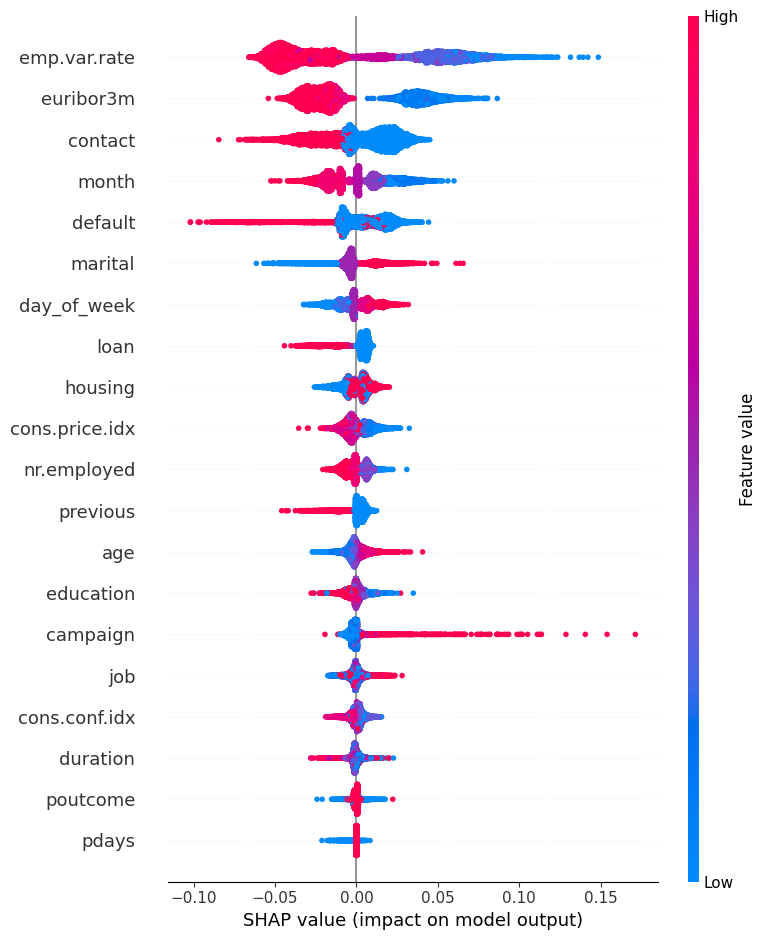

In [ ]:
import shap

# Explain the model’s predictions using SHAP
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_test)

# Summary plot of feature importance
shap.summary_plot(shap_values, x_test, feature_names=X.columns)

